### Columns Description
* ID: Unique identifier for each record in the dataset.
<br><br>
* No_Pation: Patient number or code.
<br><br>
* Gender: Male or Female.
<br><br>
* AGE: Age of the patient in years.
<br><br>
* Urea: Level of urea, a waste product reflecting kidney function.
<br><br>
* Cr (Creatinine): Level of creatinine, a waste product indicating kidney health.
<br><br>
* HbA1c: Hemoglobin A1c level, a measure of average blood glucose over time.
<br><br>
* Chol (Cholesterol): Level of cholesterol in the blood.
<br><br>
* TG (Triglycerides): Level of triglycerides, a type of fat in the blood.
<br><br>
* HDL (High-Density Lipoprotein): Level of "good" cholesterol.
<br><br>
* LDL (Low-Density Lipoprotein): Level of "bad" cholesterol.
<br><br>
* VLDL (Very Low-Density Lipoprotein): Level of very low-density lipoprotein.
<br><br>
* BMI (Body Mass Index): Measure of body fat based on height and weight.
<br><br>
* CLASS: Category or label indicating a particular class or outcome 

### Read dataset

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Dataset of Diabetes .csv")

### data overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [5]:
df.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [8]:
df.drop(['ID' , 'No_Pation'] , axis = 1 , inplace = True )

### EDA

In [11]:
df['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

In [12]:
df['Gender'].value_counts()

Gender
M    565
F    434
f      1
Name: count, dtype: int64

In [14]:
df['Gender'] = df['Gender'].apply(lambda x : 'F' if x == 'f' else x )

<Axes: xlabel='Gender', ylabel='count'>

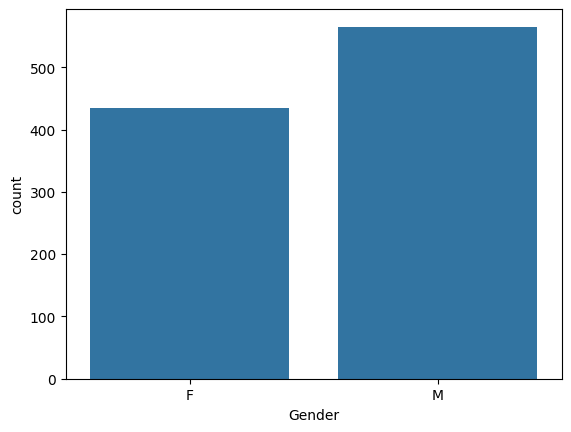

In [15]:
sns.countplot(x = df['Gender'])

In [18]:
df.select_dtypes('number').describe()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


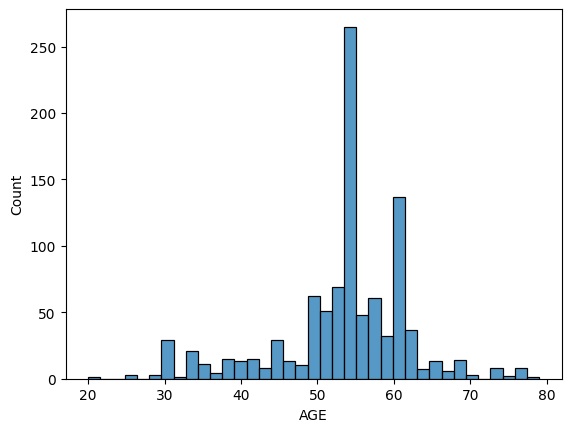

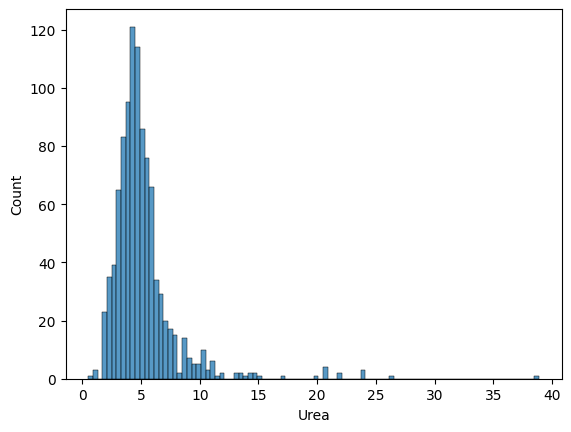

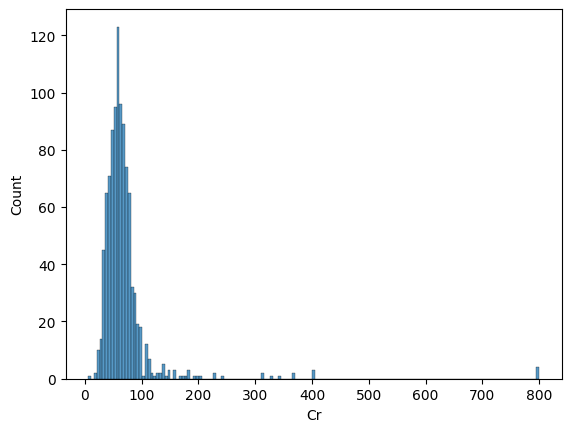

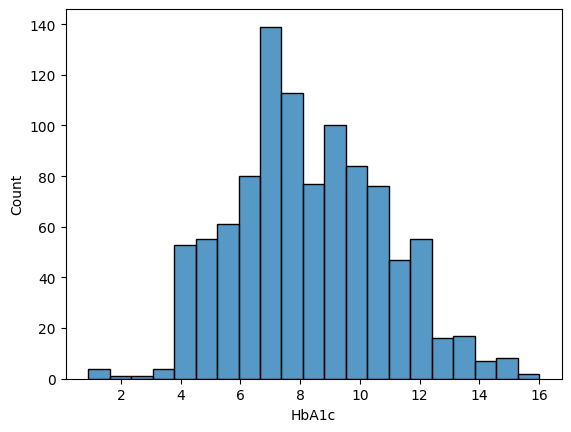

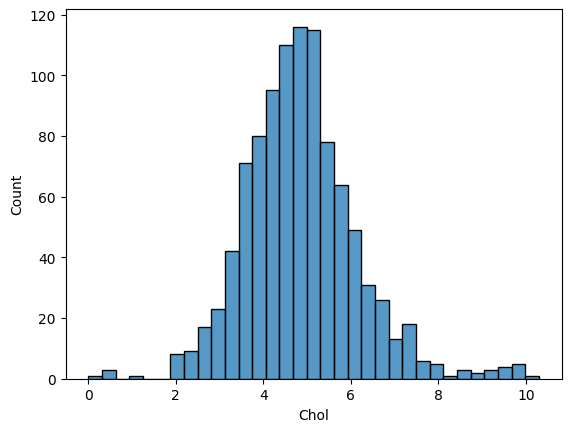

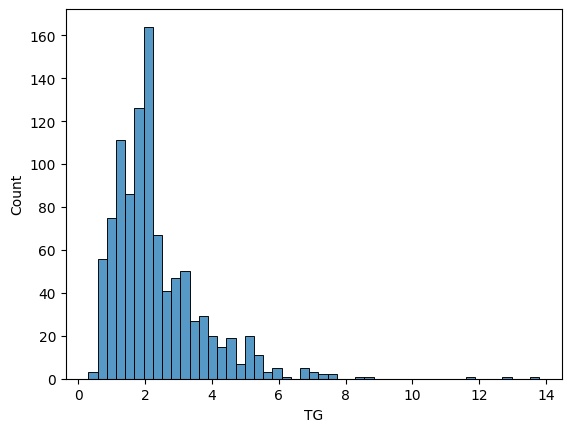

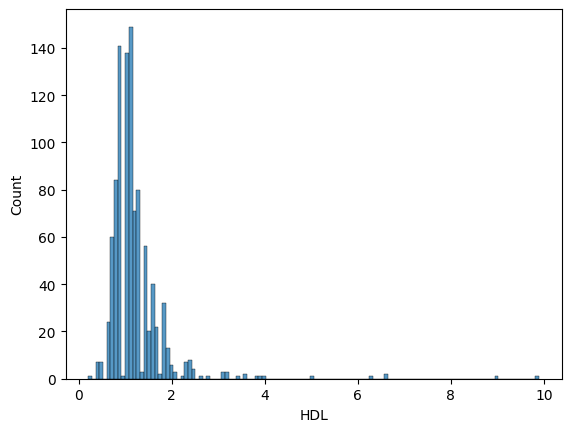

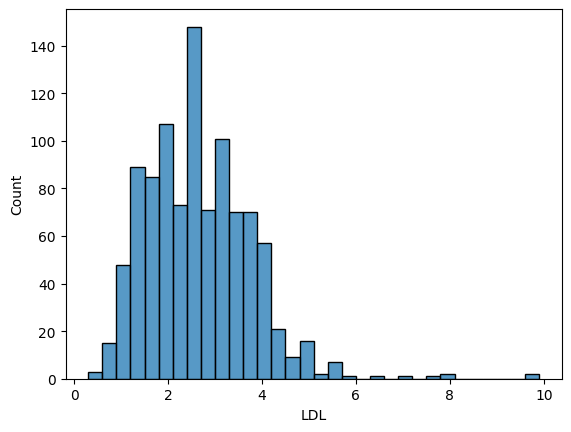

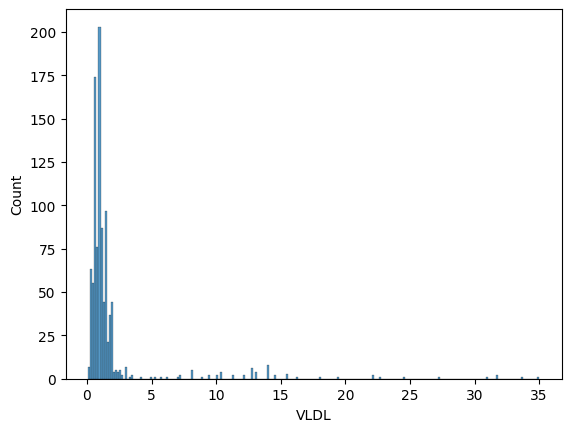

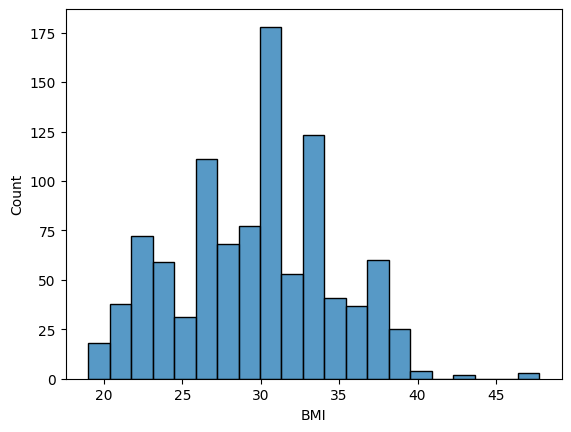

In [19]:
for col in df.select_dtypes('number').columns :
    
    plt.figure()
    sns.histplot(x = df[col])
    

In [21]:
df['Cr'] = df['Cr'] / 100 

In [22]:
df.columns 

Index(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [23]:
['Urea' , 'Cr' , 'TG' , 'HDL' , 'LDL' , 'VLDL']

['Urea', 'Cr', 'TG', 'HDL', 'LDL', 'VLDL']

In [29]:
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [31]:
df['CLASS'].str.strip().unique()

array(['N', 'P', 'Y'], dtype=object)

In [32]:
df['CLASS'] = df['CLASS'].str.strip()

<Axes: xlabel='CLASS', ylabel='count'>

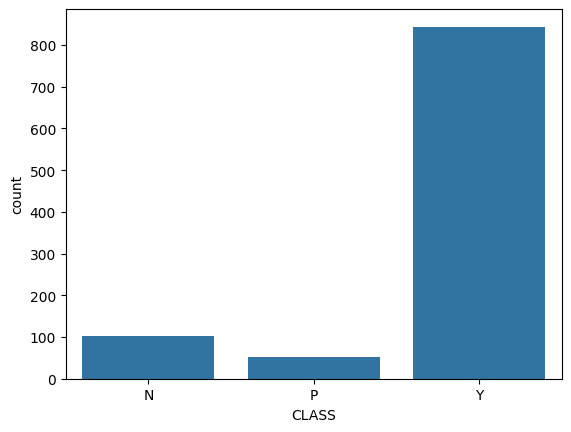

In [33]:
sns.countplot(x = df['CLASS'])

<Axes: >

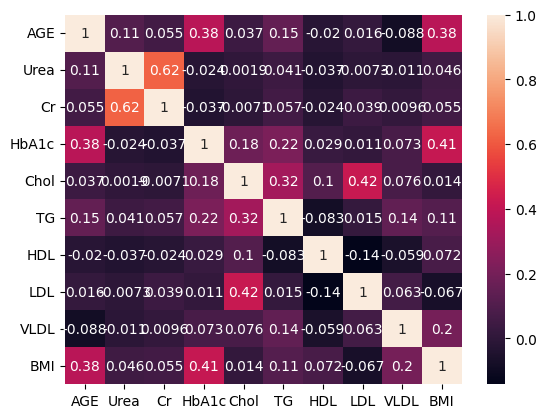

In [24]:
sns.heatmap(df.select_dtypes('number').corr() , annot=True )

<Axes: xlabel='Urea', ylabel='Cr'>

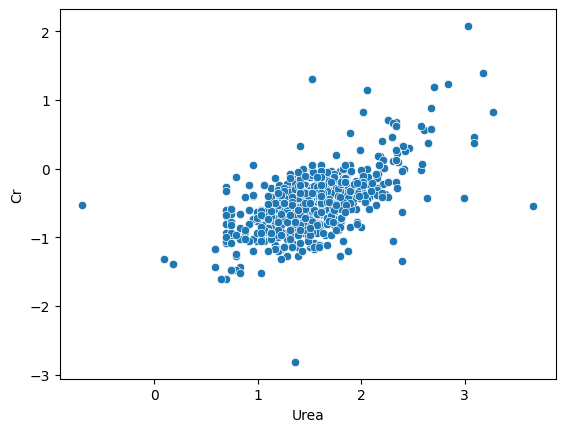

In [26]:
sns.scatterplot(x = np.log(df['Urea']) , y = np.log(df['Cr']))

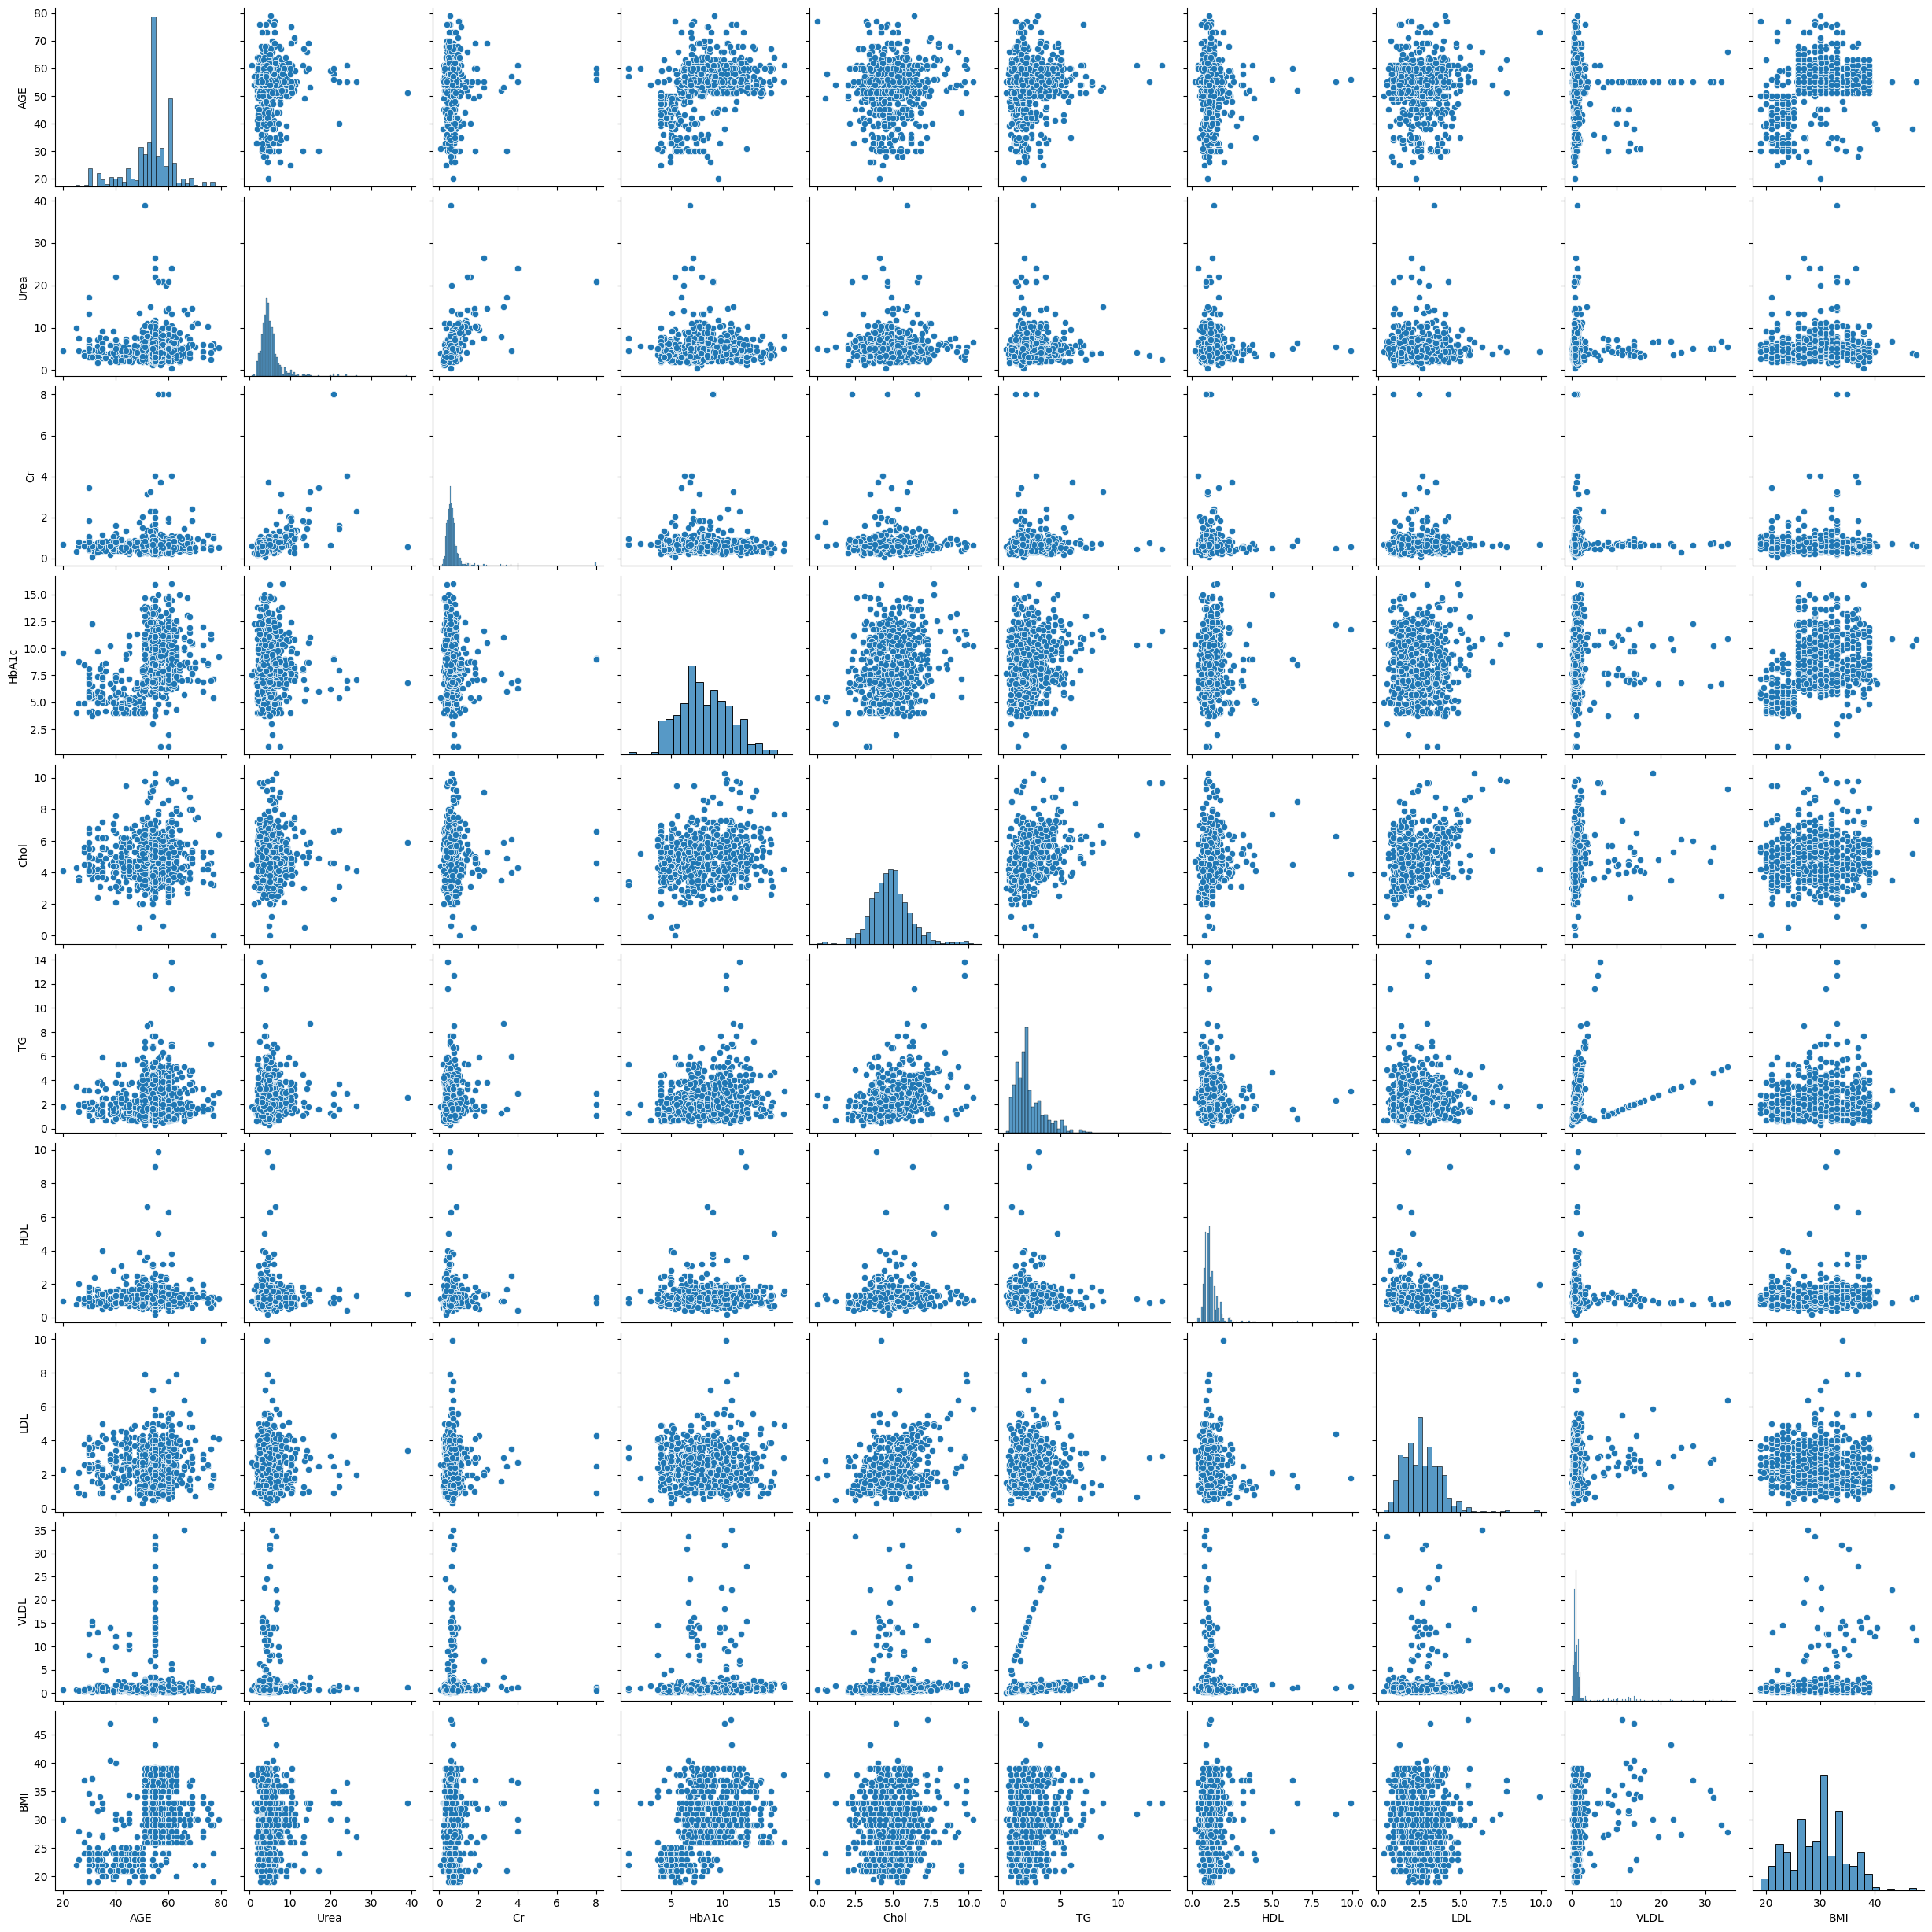

In [27]:
sns.pairplot(df.select_dtypes('number'))

<Axes: xlabel='Gender', ylabel='count'>

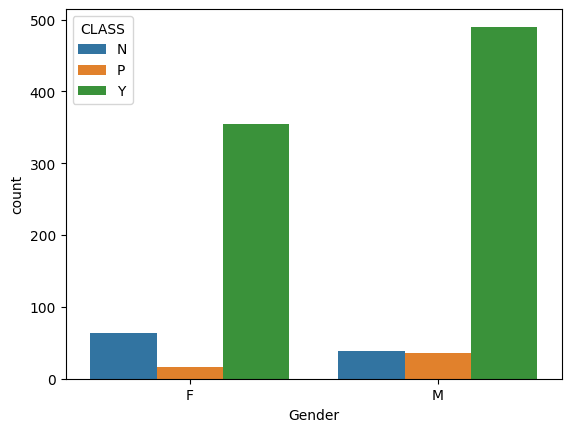

In [34]:
sns.countplot(x = df['Gender'] , hue = df['CLASS'])

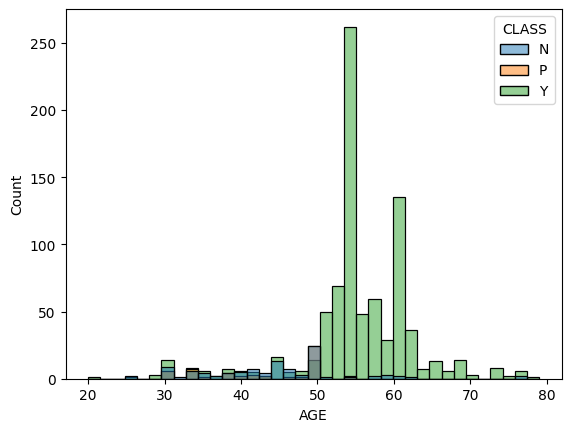

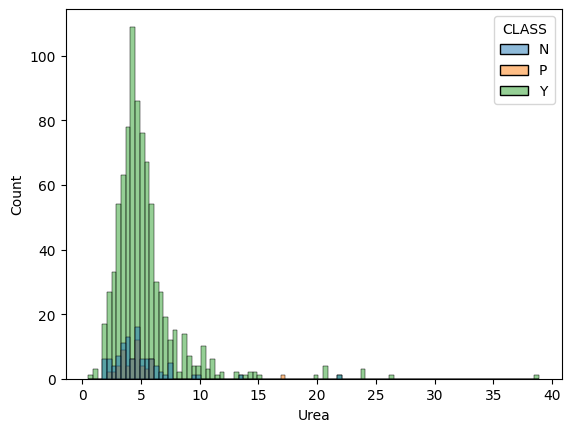

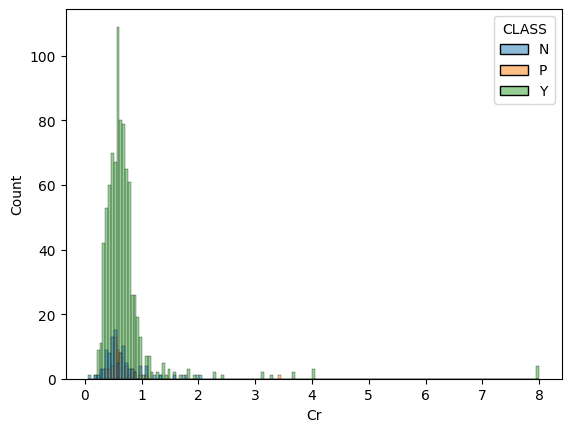

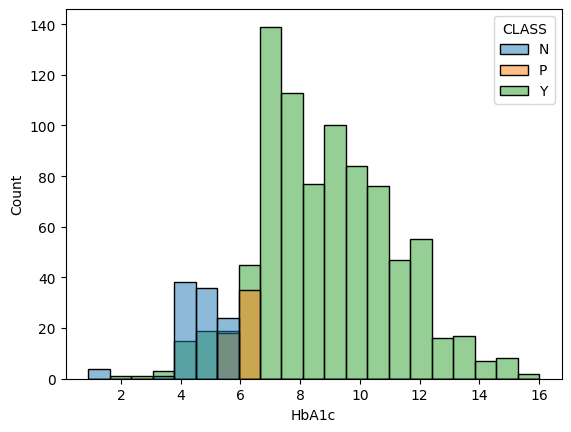

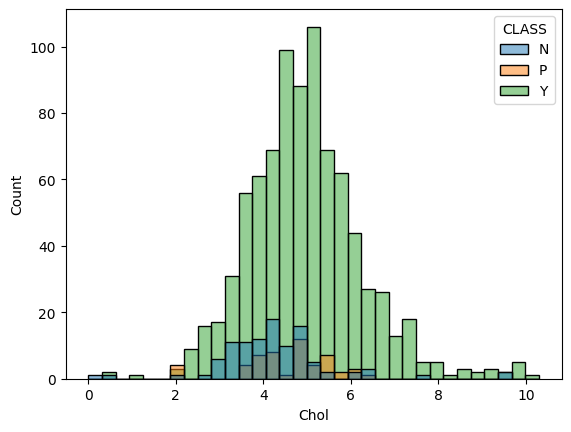

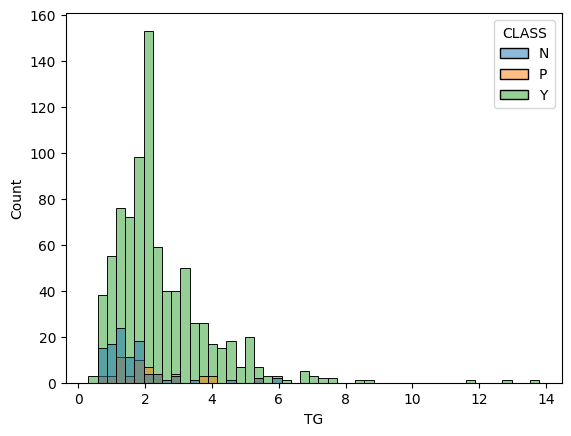

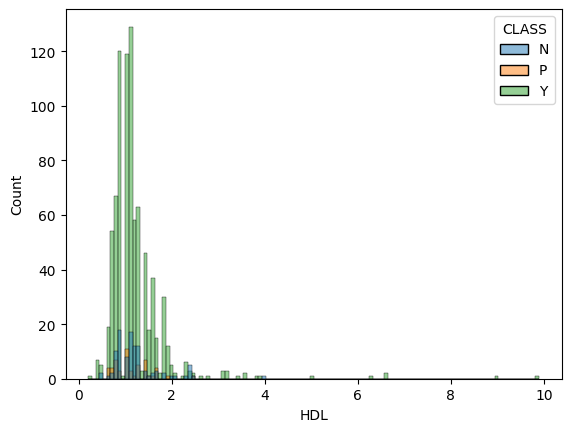

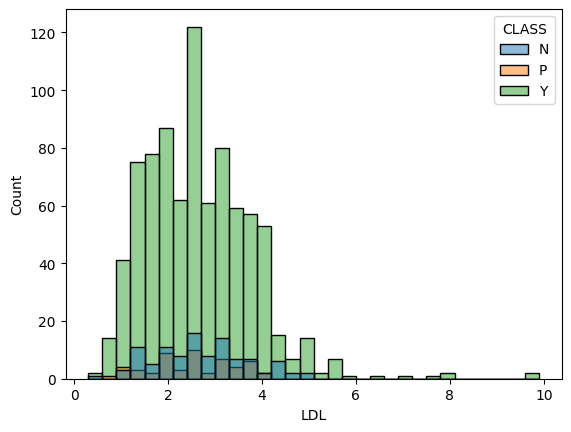

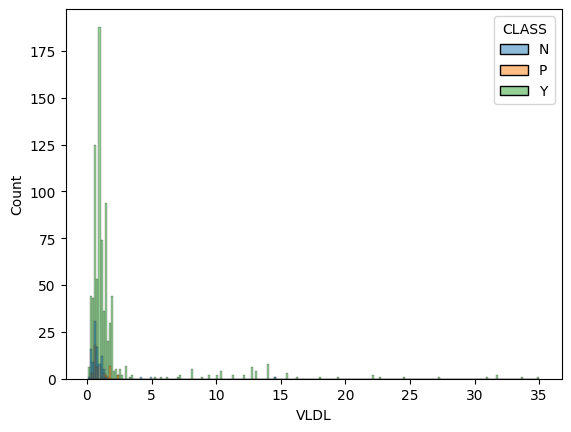

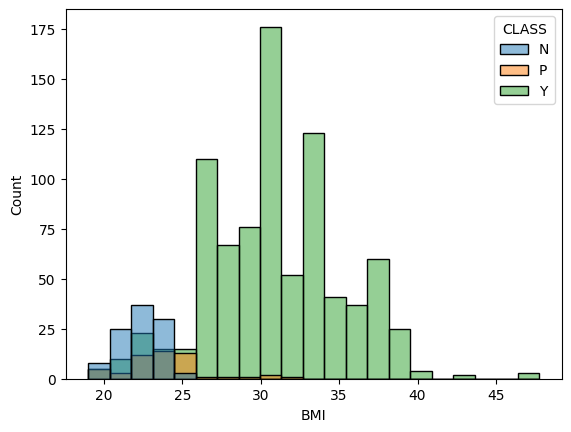

In [36]:
for col in df.select_dtypes('number').columns :
    
    plt.figure()
    sns.histplot(x = df[col] , hue = df['CLASS'])
    

### Data preprocessing 

In [98]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score , confusion_matrix , ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split , cross_validate , GridSearchCV ,StratifiedKFold

In [ ]:
['Urea' , 'Cr' , 'TG' , 'HDL' , 'LDL' , 'VLDL']

In [40]:
transformer = ColumnTransformer(transformers=[
    ('ohe' , OneHotEncoder(sparse_output=False , drop = 'first') , ['Gender']),
    ( 'log_transform' , FunctionTransformer(func=np.log) , ['Urea' , 'Cr' , 'TG' , 'HDL' , 'LDL' , 'VLDL'] )
] , remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Gender']),
                                ('log_transform',
                                 FunctionTransformer(func=<ufunc 'log'>),
                                 ['Urea', 'Cr', 'TG', 'HDL', 'LDL', 'VLDL'])])

In [41]:
le = LabelEncoder()

In [42]:
x , y = df.drop(['CLASS'] , axis = 1 ) , le.fit_transform(df['CLASS'])

In [46]:
pd.Series(y).value_counts()

2    844
0    103
1     53
Name: count, dtype: int64

In [54]:
models = [
    ('lr' , LogisticRegression(multi_class='ovr')),
    ('knnc' , KNeighborsClassifier()),
    ('NBC' , GaussianNB()),
    ('SVC' , SVC(kernel='linear')),
    ('DT' , DecisionTreeClassifier()),
    ('RFC' , RandomForestClassifier()),
    ('XGB' , XGBClassifier())
]

In [59]:
recall_scorer = make_scorer(score_func=recall_score , average = 'macro')
f1_scorer = make_scorer(score_func=f1_score , average = 'macro')

In [60]:
scoring = {
    'recall' : recall_scorer,
    'f1' : f1_scorer
}

In [63]:
for model in models :
    
    print(model[0])
    
    pl = make_pipeline(transformer , StandardScaler() , model[1])
    
    scores = cross_validate(estimator=pl , X = x , y = y ,
                            cv = StratifiedKFold(n_splits=5) , return_train_score=True , scoring = scoring)
    
    
    print(f'Train Acc : {scores["train_recall"].mean()}')
    print(f'Test Acc : {scores["test_recall"].mean()}')
    
    print('*'*15)
    
    print(f'Train Acc : {scores["train_f1"].mean()}')
    print(f'Test Acc : {scores["test_f1"].mean()}')
    
    print('-'*40)
    

lr
Train Acc : 0.6647992237216458
Test Acc : 0.6666760589837513
***************
Train Acc : 0.6574247478054828
Test Acc : 0.6500509964467159
----------------------------------------
knnc
Train Acc : 0.8412193948184911
Test Acc : 0.6836450728758421
***************
Train Acc : 0.8467137817896919
Test Acc : 0.6777483003122213
----------------------------------------
NBC
Train Acc : 0.9217212487336794
Test Acc : 0.8588984519753751
***************
Train Acc : 0.901046053271012
Test Acc : 0.8592258400877123
----------------------------------------
SVC
Train Acc : 0.7781383064594969
Test Acc : 0.7265310757618451
***************
Train Acc : 0.7965083948336432
Test Acc : 0.7001258637172264
----------------------------------------
DT
Train Acc : 1.0
Test Acc : 0.9320537582076044
***************
Train Acc : 1.0
Test Acc : 0.9105806819797742
----------------------------------------
RFC
Train Acc : 1.0
Test Acc : 0.918896103896104
***************
Train Acc : 1.0
Test Acc : 0.9155214812409301
------

### Tuning 

In [95]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.20 , random_state=7 , stratify=y)

In [97]:
pd.Series(y_train).value_counts()

2    675
0     82
1     43
Name: count, dtype: int64

In [99]:
SMOTE(sampling_strategy={0 : 400 , 1 : 450})

SMOTE(sampling_strategy={0: 400, 1: 450})

In [ ]:
DecisionTreeClassifier()

In [84]:
dt_param = [
    {
        'decisiontreeclassifier__criterion' : ["gini", "entropy", "log_loss"],
        'decisiontreeclassifier__splitter' : ["best", "random"],
        'decisiontreeclassifier__max_depth' : [2,3,4,5,6,7,8,9,10]
    }
]

In [85]:
pl = make_pipeline(transformer ,
                   StandardScaler() ,
                   SelectFromModel(RandomForestClassifier()) ,
                   DecisionTreeClassifier())

In [86]:
pl.steps

[('columntransformer',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('ohe',
                                   OneHotEncoder(drop='first',
                                                 sparse_output=False),
                                   ['Gender']),
                                  ('log_transform',
                                   FunctionTransformer(func=<ufunc 'log'>),
                                   ['Urea', 'Cr', 'TG', 'HDL', 'LDL', 'VLDL'])])),
 ('standardscaler', StandardScaler()),
 ('selectfrommodel', SelectFromModel(estimator=RandomForestClassifier())),
 ('decisiontreeclassifier', DecisionTreeClassifier())]

In [87]:
dt_srch = GridSearchCV(estimator=pl , param_grid=dt_param ,
                       cv = StratifiedKFold(n_splits=5) , return_train_score=True , scoring=scoring , refit='recall')

In [88]:
dt_srch.fit(x , y )

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['Gender']),
                                                                        ('log_transform',
                                                                         FunctionTransformer(func=<ufunc 'log'>),
                                                                         ['Urea',
                                                                          'Cr',
                                                                          'TG',
                                                                          'HDL',
                                                                          'LDL',
                                                                          'VLDL'])])),
                                       ('stan...
                                        DecisionTreeClassifier())]),
             param_grid=[{'decisiontreeclassifier__criterion': ['gini',
                                                                'entropy',
                                                                'log_loss'],
                          'decisiontreeclassifier__max_depth': [2, 3, 4, 5, 6,
                                                                7, 8, 9, 10],
                          'decisiontreeclassifier__splitter': ['best',
                                                               'random']}],
             refit='recall', return_train_score=True,
             scoring={'f1': make_scorer(f1_score, average=macro),
                      'recall': make_scorer(recall_score, average=macro)})

In [89]:
dt_srch.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 7,
 'decisiontreeclassifier__splitter': 'random'}

In [90]:
dt_srch.best_score_

0.9569069392146314

In [91]:
dt_srch.cv_results_['mean_train_recall']

array([0.8946532 , 0.45395604, 0.97935753, 0.49899467, 0.98662057,
       0.7778475 , 0.97100235, 0.78453761, 0.98002191, 0.86840422,
       0.98556193, 0.93857196, 0.99001224, 0.87913869, 0.99390665,
       0.97596645, 0.99257364, 0.97781815, 0.97126393, 0.41700541,
       0.97875789, 0.57528478, 0.98348288, 0.72442681, 0.98024362,
       0.67799539, 0.9822365 , 0.85602238, 0.98635133, 0.97261523,
       0.98487058, 0.93062248, 0.98258331, 0.94490422, 0.98761971,
       0.96864369, 0.97126393, 0.52930118, 0.97875789, 0.60555645,
       0.98348288, 0.68809343, 0.97509939, 0.76608533, 0.9822365 ,
       0.8285536 , 0.98635133, 0.88668221, 0.98477181, 0.9318486 ,
       0.98258331, 0.9620624 , 0.99084886, 0.98940656])

In [92]:
dt_srch.cv_results_['mean_test_recall']

array([0.83862138, 0.46666667, 0.95093795, 0.46612755, 0.9501443 ,
       0.77996124, 0.93379509, 0.73087485, 0.92983154, 0.78171111,
       0.94062049, 0.8595087 , 0.94046176, 0.82991995, 0.92681566,
       0.88725945, 0.91808081, 0.90430885, 0.92091306, 0.40239619,
       0.95093795, 0.56638626, 0.95093795, 0.68400313, 0.94269338,
       0.70183462, 0.94093795, 0.80174065, 0.94760462, 0.95690694,
       0.94443001, 0.88506711, 0.92808081, 0.87852694, 0.93157287,
       0.80611278, 0.92091306, 0.53668024, 0.95093795, 0.58769653,
       0.95093795, 0.73667486, 0.92364576, 0.75041813, 0.94093795,
       0.73253631, 0.94760462, 0.8095718 , 0.94443001, 0.85916306,
       0.92808081, 0.86357344, 0.92522367, 0.87420349])

In [93]:
dt_srch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender']),
                                                 ('log_transform',
                                                  FunctionTransformer(func=<ufunc 'log'>),
                                                  ['Urea', 'Cr', 'TG', 'HDL',
                                                   'LDL', 'VLDL'])])),
                ('standardscaler', StandardScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=RandomForestClassifier())),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                        splitter='random'))])

In [94]:
import joblib

In [100]:
joblib.dump(dt_srch.best_estimator_ , 'Model.h5')

['Model.h5']

In [102]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [103]:
df.columns

Index(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [105]:
df.select_dtypes('number').describe()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.528000,5.124743,0.689430,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,8.799241,2.935165,0.599847,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,20.000000,0.500000,0.060000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,51.000000,3.700000,0.480000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,55.000000,4.600000,0.600000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,59.000000,5.700000,0.730000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,79.000000,38.900000,8.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


### <center>Make python file to write your streamlit deployment code</center>